<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/master/Banking_interest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
%matplotlib inline

# Data Read

In [0]:
path="/content"

In [0]:
train=pd.read_csv(path+'/train.csv')
test=pd.read_csv(path+'/test.csv')

In [8]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [9]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [10]:
train.shape

(164309, 14)

In [11]:
test.shape

(109541, 13)

# To check how much data is null

In [12]:
train.isnull().sum()*100/train.shape[0]

Loan_ID                     0.000000
Loan_Amount_Requested       0.000000
Length_Employed             4.486060
Home_Owner                 15.427639
Annual_Income              15.277313
Income_Verified             0.000000
Purpose_Of_Loan             0.000000
Debt_To_Income              0.000000
Inquiries_Last_6Mo          0.000000
Months_Since_Deliquency    53.788289
Number_Open_Accounts        0.000000
Total_Accounts              0.000000
Gender                      0.000000
Interest_Rate               0.000000
dtype: float64

In [13]:
test.isnull().sum()*100/test.shape[0]

Loan_ID                     0.000000
Loan_Amount_Requested       0.000000
Length_Employed             4.506075
Home_Owner                 15.255475
Annual_Income              15.426187
Income_Verified             0.000000
Purpose_Of_Loan             0.000000
Debt_To_Income              0.000000
Inquiries_Last_6Mo          0.000000
Months_Since_Deliquency    53.732392
Number_Open_Accounts        0.000000
Total_Accounts              0.000000
Gender                      0.000000
dtype: float64

In [0]:
data=pd.concat([train,test],axis='rows')

In [15]:
data.isnull().sum()*100/data.shape[0]

Loan_ID                     0.000000
Loan_Amount_Requested       0.000000
Length_Employed             4.494066
Home_Owner                 15.358773
Annual_Income              15.336863
Income_Verified             0.000000
Purpose_Of_Loan             0.000000
Debt_To_Income              0.000000
Inquiries_Last_6Mo          0.000000
Months_Since_Deliquency    53.765930
Number_Open_Accounts        0.000000
Total_Accounts              0.000000
Gender                      0.000000
Interest_Rate              40.000365
dtype: float64

In [16]:
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0


In [17]:
data.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate              float64
dtype: object

In [0]:
columns=data.columns

In [0]:
categorical=list()
numeric=list()

In [0]:
for i in columns:
    if(data[i].dtypes=='object'):
        categorical.append(i)
    else:
        numeric.append(i)

In [21]:
print("Categorical values in data :"+ str(categorical))

Categorical values in data :['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']


In [22]:
print("Numerical values in data :"+ str(numeric))

Numerical values in data :['Loan_ID', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']


In [23]:
for i in columns:
    print("***********************************************************************************")
    print(data[i].value_counts())
    print(data[i].unique())
    print("***********************************************************************************")

***********************************************************************************
10000365    1
10154763    1
10117913    1
10119960    1
10097431    1
           ..
10173901    1
10171852    1
10161611    1
10159562    1
10000403    1
Name: Loan_ID, Length: 273850, dtype: int64
[10000001 10000002 10000003 ... 10273848 10273849 10273850]
***********************************************************************************
***********************************************************************************
10,000    19442
12,000    15020
15,000    13848
20,000    13399
35,000     9811
          ...  
31,650        1
33,875        1
800           1
31,475        1
31,850        1
Name: Loan_Amount_Requested, Length: 1320, dtype: int64
['7,000' '30,000' '24,725' ... '32,700' '33,450' '34,425']
***********************************************************************************
***********************************************************************************
10+ years    88328
2 years     

In [37]:
print(data['Length_Employed'].unique())

['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']


In [0]:
#Missing Values for Length_Employed Parameter

data['Length_Employed'] = data['Length_Employed'].map(lambda x: str(x).rstrip(' years'))
data['Length_Employed'] = data['Length_Employed'].replace(['< 1'],'0.5')
data['Length_Employed'] = data['Length_Employed'].replace(['10+'],'10')
data['Length_Employed'] = data['Length_Employed'].replace(['nan'],'0')

In [39]:
data['Length_Employed'].value_counts()

10     88328
2      24420
3      21478
0.5    21133
5      18042
1      17336
4      16393
7      15444
6      15351
8      13115
0      12307
9      10503
Name: Length_Employed, dtype: int64

In [0]:
data['Income_Verified']=data['Income_Verified'].replace(['VERIFIED - income','VERIFIED - income source'],'VERIFIED')
data['Income_Verified']=data['Income_Verified'].replace('not verified','NOT VERIFIED')

In [41]:
data['Income_Verified'].unique()

array(['NOT VERIFIED', 'VERIFIED'], dtype=object)

In [0]:
data['Loan_Amount_Requested']=data['Loan_Amount_Requested'].replace(',','',regex=True).astype(float)

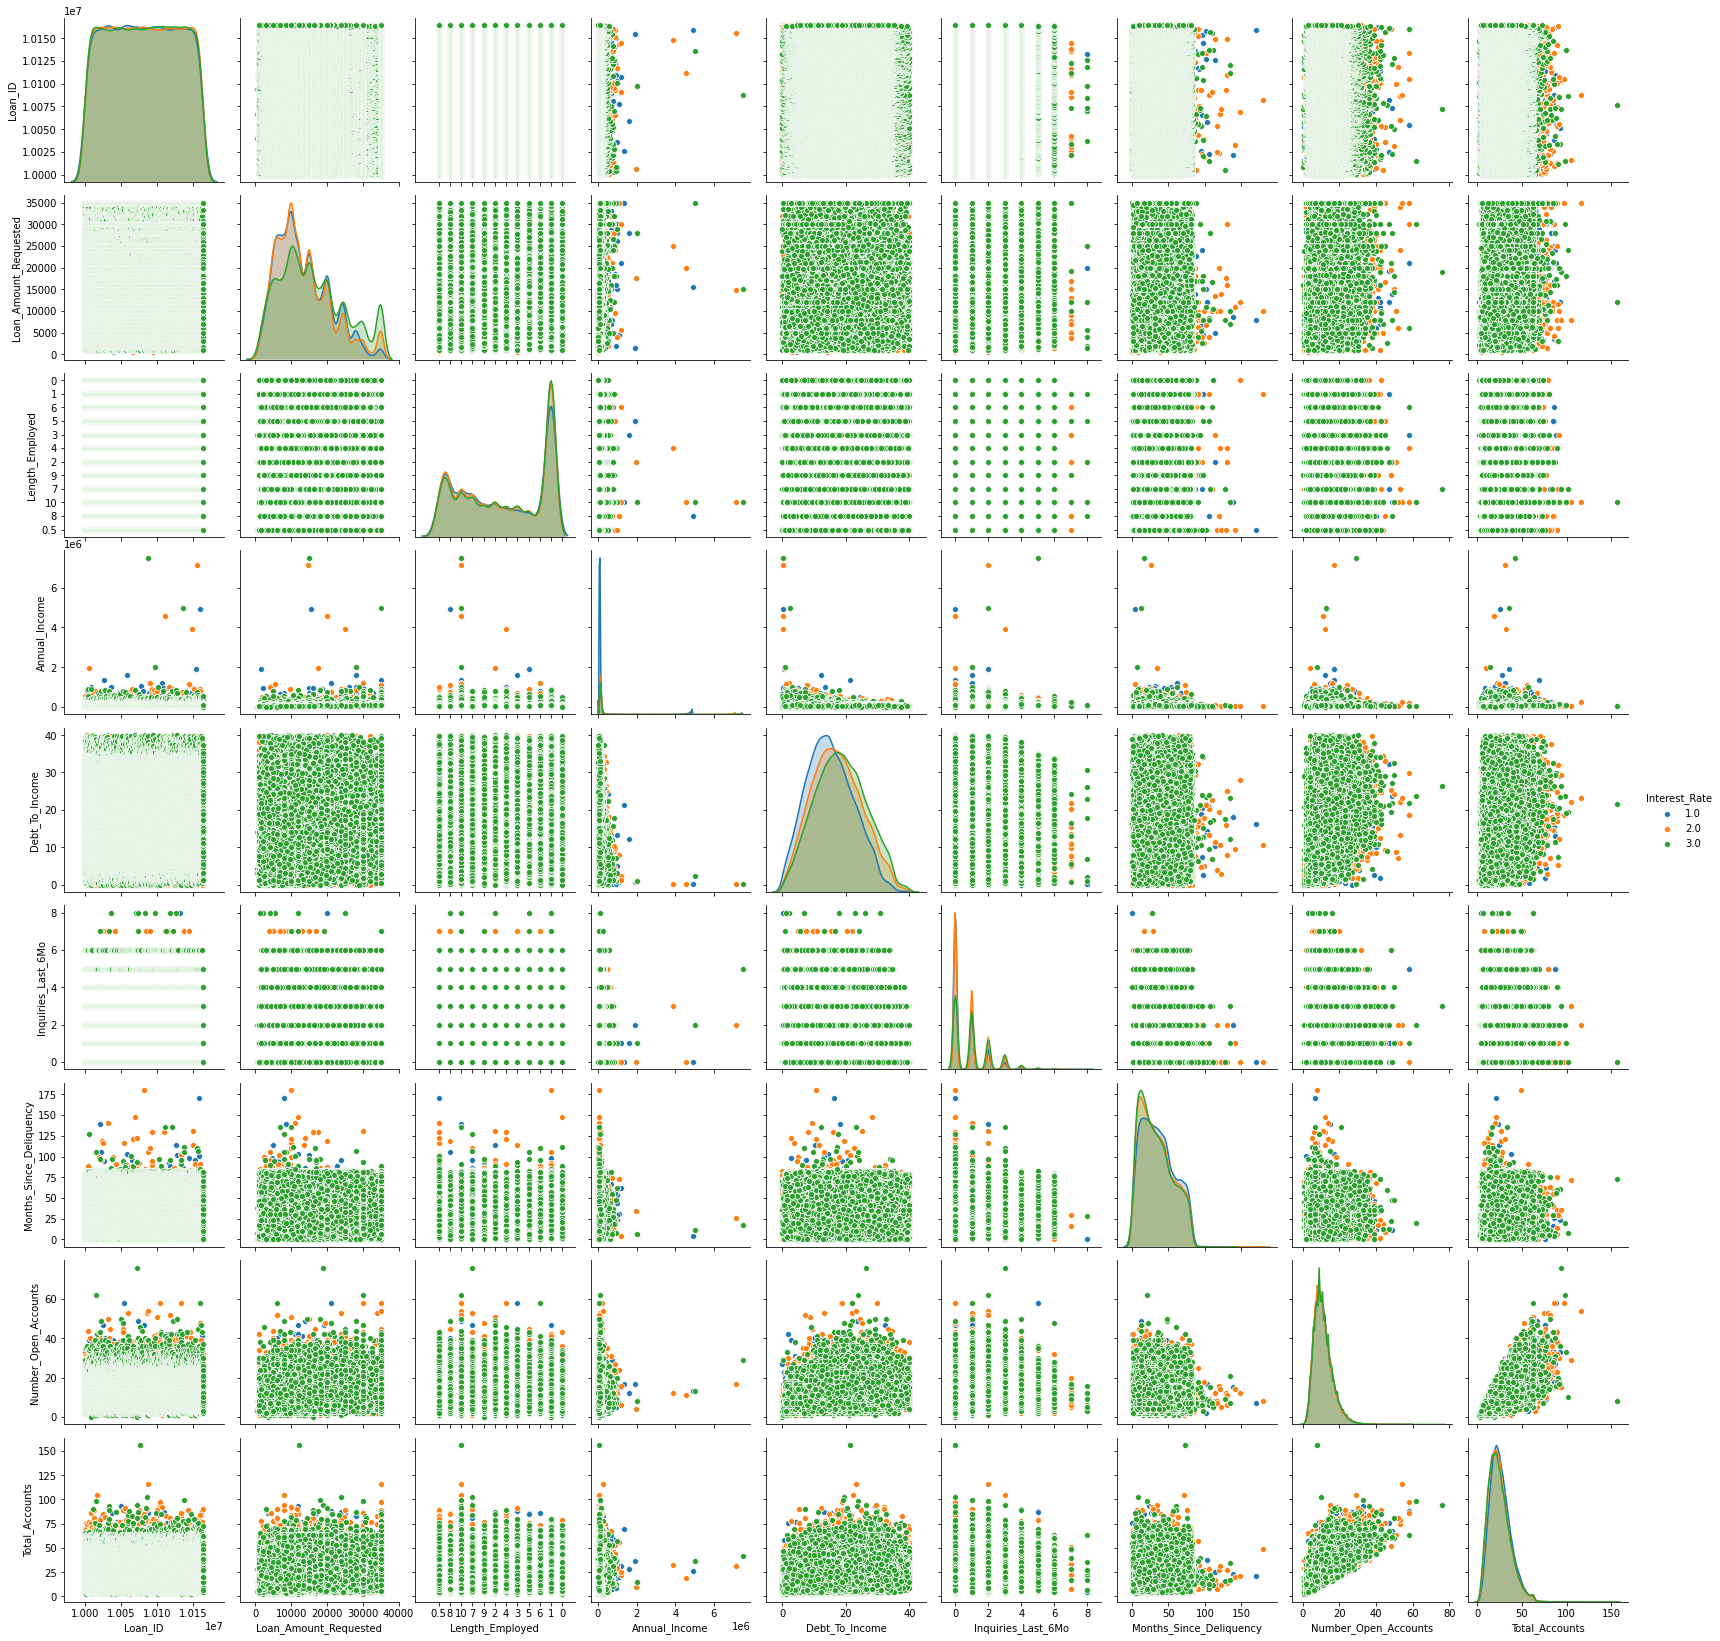

In [30]:
sns.pairplot(data,hue='Interest_Rate')

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text major ticklabel objects>)

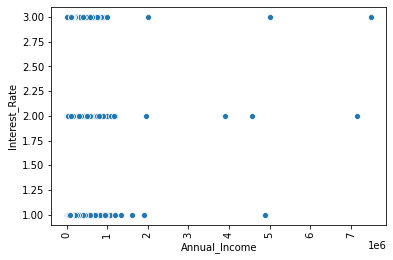

In [43]:
sns.scatterplot(data['Annual_Income'],data['Interest_Rate'])
plt.xticks(rotation=90)

In [46]:
data['Home_Owner'].value_counts()

Mortgage    117270
Rent         93542
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64

In [47]:
data['Home_Owner'].unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [49]:
len(data['Home_Owner'].isnull())

273850

In [44]:
#data['Annual_Income'].sort_values()
data['Annual_Income'].value_counts()

60000.00    8975
50000.00    7962
65000.00    6631
40000.00    6386
70000.00    6146
            ... 
25590.00       1
51179.00       1
35750.00       1
46326.16       1
32769.00       1
Name: Annual_Income, Length: 18573, dtype: int64

In [50]:
#Missing Values for Home_Owner Parameter

data['Home_Owner'] = data['Home_Owner'].fillna('None')
data['Home_Owner'].unique()

array(['Rent', 'Mortgage', 'None', 'Own', 'Other'], dtype=object)

In [51]:
#Missing Values for Annual_Income Parameter
data['Annual_Income'].unique()

median_imputer = SimpleImputer(strategy='mean')
median_imputer =median_imputer.fit(data[['Annual_Income']])
data[['Annual_Income']]= median_imputer.transform(data[['Annual_Income']])

data['Annual_Income'].unique()
data['Annual_Income'].isnull().sum()

0

In [0]:
#Deleting the Column Months_Since_Deliquency 53% data is null

data.drop(['Months_Since_Deliquency'], axis=1, inplace = True)

In [53]:
data.isnull().sum()*100/data.shape[0]

Loan_ID                   0.000000
Loan_Amount_Requested     0.000000
Length_Employed           0.000000
Home_Owner                0.000000
Annual_Income             0.000000
Income_Verified           0.000000
Purpose_Of_Loan           0.000000
Debt_To_Income            0.000000
Inquiries_Last_6Mo        0.000000
Number_Open_Accounts      0.000000
Total_Accounts            0.000000
Gender                    0.000000
Interest_Rate            40.000365
dtype: float64

In [54]:
data[categorical].head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,7000.0,0.5,Rent,NOT VERIFIED,car,Female
1,30000.0,4,Mortgage,VERIFIED,debt_consolidation,Female
2,24725.0,7,Mortgage,VERIFIED,debt_consolidation,Male
3,16000.0,0.5,None,VERIFIED,debt_consolidation,Male
4,17000.0,8,Own,VERIFIED,debt_consolidation,Female


In [55]:
data['Home_Owner'].value_counts()

Mortgage    117270
Rent         93542
None         42080
Own          20879
Other           79
Name: Home_Owner, dtype: int64

In [56]:
data['Home_Owner'].unique()

array(['Rent', 'Mortgage', 'None', 'Own', 'Other'], dtype=object)

In [0]:
data['Home_Owner']=data['Home_Owner'].replace('Own','e')
data['Home_Owner']=data['Home_Owner'].replace('Mortgage','d')
data['Home_Owner']=data['Home_Owner'].replace('Rent','c')
data['Home_Owner']=data['Home_Owner'].replace('Other','b')
data['Home_Owner']=data['Home_Owner'].replace('None','a')

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le=LabelEncoder()

In [0]:
le.fit(data['Home_Owner'])
data['Home_Owner']=le.transform(data['Home_Owner'])

In [61]:
data['Home_Owner'].value_counts()  

3    117270
2     93542
0     42080
4     20879
1        79
Name: Home_Owner, dtype: int64

In [62]:
data['Income_Verified'].value_counts()

VERIFIED        187329
NOT VERIFIED     86521
Name: Income_Verified, dtype: int64

In [0]:
data['Income_Verified']=data['Income_Verified'].replace('VERIFIED','b')
data['Income_Verified']=data['Income_Verified'].replace('NOT VERIFIED','a')

In [0]:
le.fit(data['Income_Verified'])
data['Income_Verified']=le.transform(data['Income_Verified'])

In [65]:
data['Income_Verified'].value_counts()

1    187329
0     86521
Name: Income_Verified, dtype: int64

In [0]:
df_Purpose_Of_Loan=pd.get_dummies(data['Purpose_Of_Loan'])
df_Gender=pd.get_dummies(data['Gender'])

In [0]:
df=pd.concat([data,df_Purpose_Of_Loan,df_Gender],axis='columns')

In [68]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male
0,10000001,7000.0,0.5,2,68000.000000,0,car,18.37,0,9,14,Female,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000002,30000.0,4,3,73392.793977,1,debt_consolidation,14.93,0,12,24,Female,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000003,24725.0,7,3,75566.400000,1,debt_consolidation,15.88,0,12,16,Male,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10000004,16000.0,0.5,0,56160.000000,1,debt_consolidation,14.34,3,16,22,Male,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10000005,17000.0,8,4,96000.000000,1,debt_consolidation,22.17,1,19,30,Female,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [69]:
df.dtypes

Loan_ID                    int64
Loan_Amount_Requested    float64
Length_Employed           object
Home_Owner                 int64
Annual_Income            float64
Income_Verified            int64
Purpose_Of_Loan           object
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts             int64
Gender                    object
Interest_Rate            float64
car                        uint8
credit_card                uint8
debt_consolidation         uint8
educational                uint8
home_improvement           uint8
house                      uint8
major_purchase             uint8
medical                    uint8
moving                     uint8
other                      uint8
renewable_energy           uint8
small_business             uint8
vacation                   uint8
wedding                    uint8
Female                     uint8
Male                       uint8
dtype: object

In [0]:
df['Length_Employed']=df['Length_Employed'].astype('float')

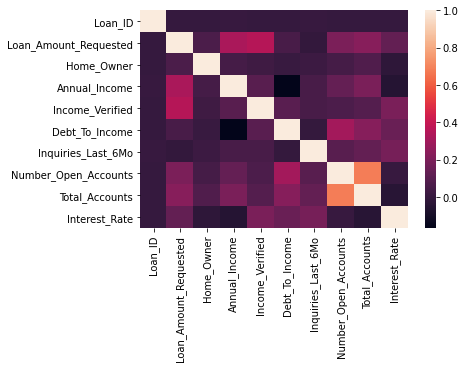

In [71]:
correlation = data.corr()

sns.heatmap(correlation)

In [0]:
#Dropping one of the highly correlated parameters

df.drop(['Number_Open_Accounts','Gender','Purpose_Of_Loan','Loan_ID','Female','wedding'], axis=1, inplace = True)

In [73]:
df.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Total_Accounts', 'Interest_Rate', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'Male'],
      dtype='object')

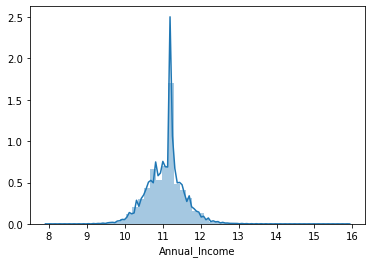

In [74]:
sns.distplot(np.log(df['Annual_Income']))

In [0]:
df['log_Annual_Income'] = np.log(df['Annual_Income'])
df['log_Loan_Amount_Requested'] = np.log(df['Loan_Amount_Requested'])

In [0]:
df.drop(['Annual_Income','log_Loan_Amount_Requested'],axis=1,inplace=True)

In [87]:
df['Loan_Amount_Requested'].value_counts()

10000.0    19442
12000.0    15020
15000.0    13848
20000.0    13399
35000.0     9811
           ...  
30450.0        1
30775.0        1
30725.0        1
31650.0        1
32775.0        1
Name: Loan_Amount_Requested, Length: 1320, dtype: int64

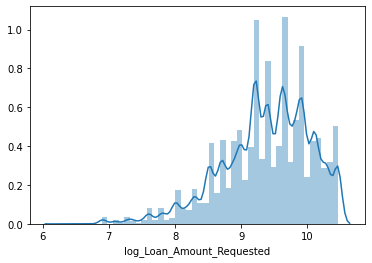

In [79]:
sns.distplot(df['log_Loan_Amount_Requested'])

In [88]:
train_data = df.iloc[:164309,:]
test_data = df.iloc[164309:,:]

test_data.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Income_Verified', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Total_Accounts', 'Interest_Rate', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'Male', 'log_Annual_Income'],
      dtype='object')

In [0]:
X = train_data.drop(['Interest_Rate'], axis=1)
y = train_data['Interest_Rate']

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 6)

In [0]:
X_train = X
y_train = y

X_test = test_data.drop(['Interest_Rate'], axis=1)


In [91]:
X_train.dtypes

Loan_Amount_Requested    float64
Length_Employed          float64
Home_Owner                 int64
Income_Verified            int64
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Total_Accounts             int64
car                        uint8
credit_card                uint8
debt_consolidation         uint8
educational                uint8
home_improvement           uint8
house                      uint8
major_purchase             uint8
medical                    uint8
moving                     uint8
other                      uint8
renewable_energy           uint8
small_business             uint8
vacation                   uint8
Male                       uint8
log_Annual_Income        float64
dtype: object

In [92]:
X_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,Male,log_Annual_Income
0,7000.0,0.5,2,0,18.37,0,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.127263
1,30000.0,4.0,3,1,14.93,0,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,11.203581
2,24725.0,7.0,3,1,15.88,0,16,0,0,1,0,0,0,0,0,0,0,0,0,0,1,11.232767
3,16000.0,0.5,0,1,14.34,3,22,0,0,1,0,0,0,0,0,0,0,0,0,0,1,10.935960
4,17000.0,8.0,4,1,22.17,1,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,11.472103


In [93]:
y_train.head()

0    1.0
1    3.0
2    3.0
3    3.0
4    1.0
Name: Interest_Rate, dtype: float64

In [0]:
sample_submission=pd.read_csv('/content/sample_submission.csv')

In [95]:
sample_submission.head()

,Loan_ID,Interest_Rate
0,10164310,1
1,10164311,1
2,10164312,1
3,10164313,1
4,10164314,1


# DecisionTreeClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
DTC_model=DecisionTreeClassifier()

In [0]:
DTC_model.fit(X_train,y_train)
y_pred=DTC_model.predict(X_test)

In [99]:
y_pred

array([3., 1., 3., ..., 3., 3., 3.])

In [0]:
df_ypred=pd.DataFrame(y_pred)

In [101]:
df_ypred.head()

,0
0,3.0
1,1.0
2,3.0
3,3.0
4,3.0


In [0]:
sample=pd.concat([sample_submission,df_ypred],axis='columns')

In [103]:
sample.head()

,Loan_ID,Interest_Rate,0
0,10164310,1,3.0
1,10164311,1,1.0
2,10164312,1,3.0
3,10164313,1,3.0
4,10164314,1,3.0


In [104]:
sample.columns

Index(['Loan_ID', 'Interest_Rate', 0], dtype='object')

In [0]:
sample.drop(['Interest_Rate'],axis=1,inplace=True)
sample.rename(columns={0:'Interest_Rate'},inplace=True)

In [0]:
sample.to_csv('Sample_submission.csv',index=False)

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.31      0.29      0.30     10669
         2.0       0.44      0.45      0.45     20705
         3.0       0.46      0.46      0.46     17919

    accuracy                           0.42     49293
   macro avg       0.40      0.40      0.40     49293
weighted avg       0.42      0.42      0.42     49293



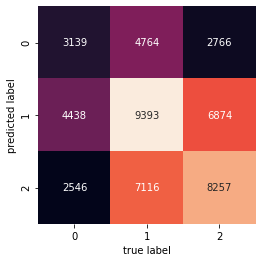

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
from sklearn.metrics import r2_score
r2_score_dt=-r2_score(y_test, y_pred)
print(r2_score_dt)

0.6585826124102079


# BaggingClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.80,bootstrap=True,random_state=1)
bag.fit(X_train,y_train)
y_pred_bag=bag.predict(X_test)

# 0.489596082933506

In [0]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=500, max_samples=0.80,bootstrap=True,oob_score=True,random_state=1)
bag.fit(X_train,y_train)
y_pred_bag=bag.predict(X_test)

# 0.491067493848396

In [0]:
df_ypred_bag=pd.DataFrame(y_pred_bag)
sample=pd.concat([sample_submission,df_ypred_bag],axis='columns')
sample.drop(['Interest_Rate'],axis=1,inplace=True)
sample.rename(columns={0:'Interest_Rate'},inplace=True)
sample.to_csv('Sample_submission.csv',index=False)

In [0]:
print(metrics.classification_report(y_pred_bag, y_test))

              precision    recall  f1-score   support

         1.0       0.24      0.41      0.30      5851
         2.0       0.58      0.49      0.53     25231
         3.0       0.55      0.54      0.54     18211

    accuracy                           0.50     49293
   macro avg       0.45      0.48      0.46     49293
weighted avg       0.53      0.50      0.51     49293



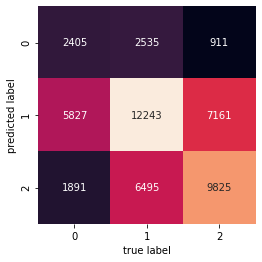

In [0]:
mat = confusion_matrix(y_test, y_pred_bag)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
r2_score_bag=-r2_score(y_test, y_pred)
print(r2_score_bag)

0.6585826124102079


# Adaboost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500,algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred_adb=ada_clf.predict(X_test)

#0.479313489964949

In [0]:
df_ypred_adb=pd.DataFrame(y_pred_adb)
sample=pd.concat([sample_submission,df_ypred_adb],axis='columns')
sample.drop(['Interest_Rate'],axis=1,inplace=True)
sample.rename(columns={0:'Interest_Rate'},inplace=True)
sample.to_csv('Sample_submission.csv',index=False)

# Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators=500, warm_start=True,subsample=0.25,learning_rate=0.5)
gbrt.fit(X_train, y_train)
y_pred_gdb=gbrt.predict(X_test)

In [0]:
df_ypred_gdb=pd.DataFrame(y_pred_gdb)
sample=pd.concat([sample_submission,df_ypred_gdb],axis='columns')
sample.drop(['Interest_Rate'],axis=1,inplace=True)
sample.rename(columns={0:'Interest_Rate'},inplace=True)
sample.to_csv('Sample_submission.csv',index=False)

# RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)
y_pred_RF=model.predict(X_test)

# 0.487559411351662	

In [1]:
model = RandomForestClassifier(n_estimators=500, n_jobs=-1)
model.fit(X_train,y_train)
y_pred_RF=model.predict(X_test)

NameError: ignored

# 0.440082476031611

In [0]:
df_ypred_rf=pd.DataFrame(y_pred_RF)
sample=pd.concat([sample_submission,df_ypred_rf],axis='columns')
sample.drop(['Interest_Rate'],axis=1,inplace=True)
sample.rename(columns={0:'Interest_Rate'},inplace=True)
sample.to_csv('Sample_submission.csv',index=False)
